# Devoir 1 : Chaine de valeur de l'énergie

Le mandat dans le plan de cours est le suivant: 

>Le premier travail (15 %) consiste en une présentation de données énergétiques spécifiques, à partir d’une des sources de données principales décrite à la séance 1 (IEA, EIA, BP/Statistical Review of World Energy, Statistique Canada), ou à partir d'une autre source discutée avec le professeur, sur un thème choisi par l’étudiant.
Le document remis doit avoir au plus 10 pages, contenir les sources des données, des tableaux de données, des graphiques (originaux, c'est à dire que vous avez vous-même créé, et non pas copié-collé d'autres documents), des comparaisons pertinentes entre pays ou énergies et une discussion sur des tendances.
C'est un travail qui vise essentiellement à être descriptif.
>
>Vous ne pouvez pas avoir recours à l'Intelligence artificielle générative (IAG). Vous devez générer vous même un sujet, des graphiques et des commentaires.



## Création de l'API pour importation des données et définition de constantes

Pour franciser la visualisation un dictionnaire de conversion des noms de continents est créé. D'autre part, certains des paramètres des figures sont mis à jour ici. Les différentes listes donnant les territoire à télécharger pour les différentes requêtes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.eia_internation_data_queries import eia_api_PC,plot_by_region_and_type 
from matplotlib import patches

api = eia_api_PC()
plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams.update({'font.size': 20})
country_dict_francais = {"Africa":"Afrique","Asia & Oceania":"Asie et Océanie","Central & South America":"Amérique centrale et du Sud","Eurasia":"Eurasie","Europe":"Europe","Middle East":"Moyen-Orient","North America":"Amérique du Nord"}
fuel_dict_francais = {"Coal":"Charbon","Natural gas":"Gaz Naturel","Petroleum and other liquids":"Pétrole et autres liquides","Nuclear":"Nucléaire","Renewables and other":"Renouvelables et autres"}
region_list_by_region = ["AFRC","ASOC","CSAM","EURA","EURO","MIDE","NOAM"]
region_list_global = "WORL"
bar_plot_year_list = [1981,1990,2000,2010,2020]

## Importation des données de population et de PIB
On peut aller chercher quels sont les numéros de requêtes et les unités dans cet utilitaire:
https://www.eia.gov/opendata/browser/

Commençons par les données socio économiques de base

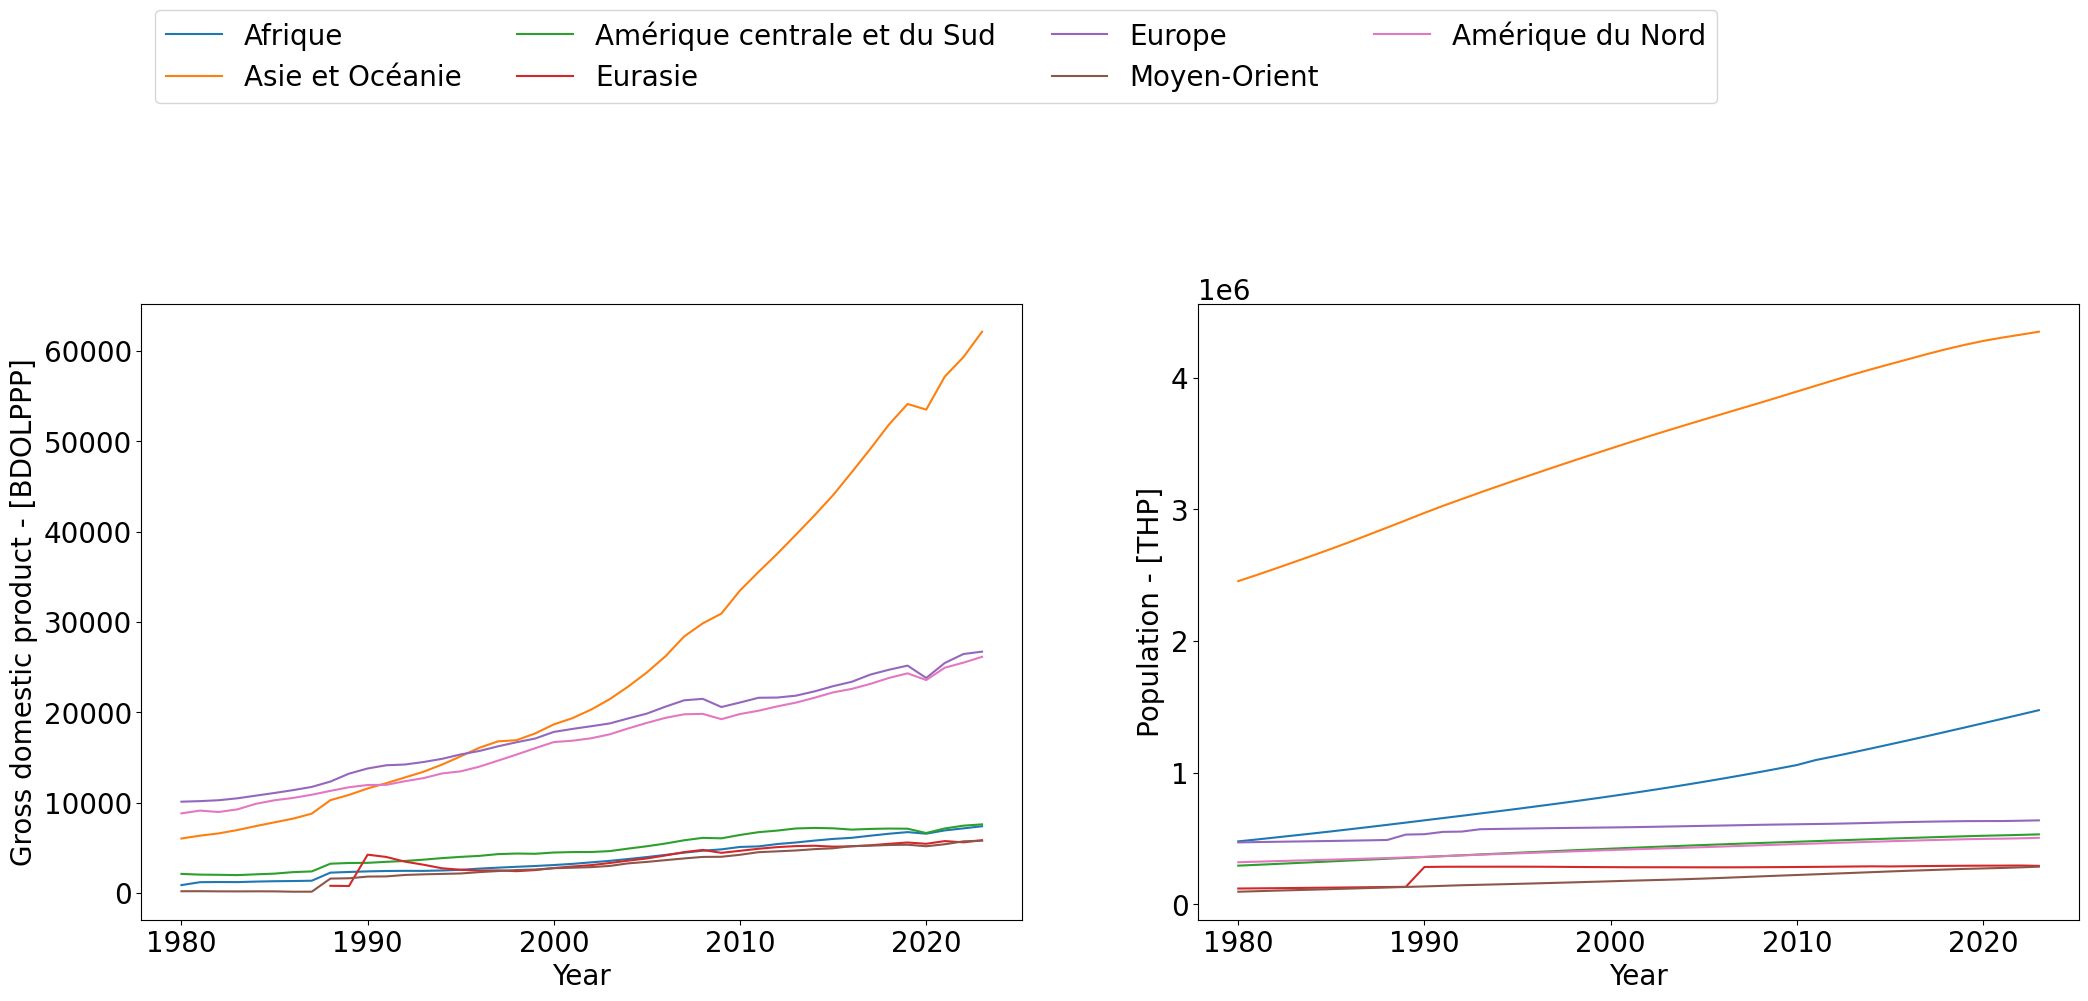

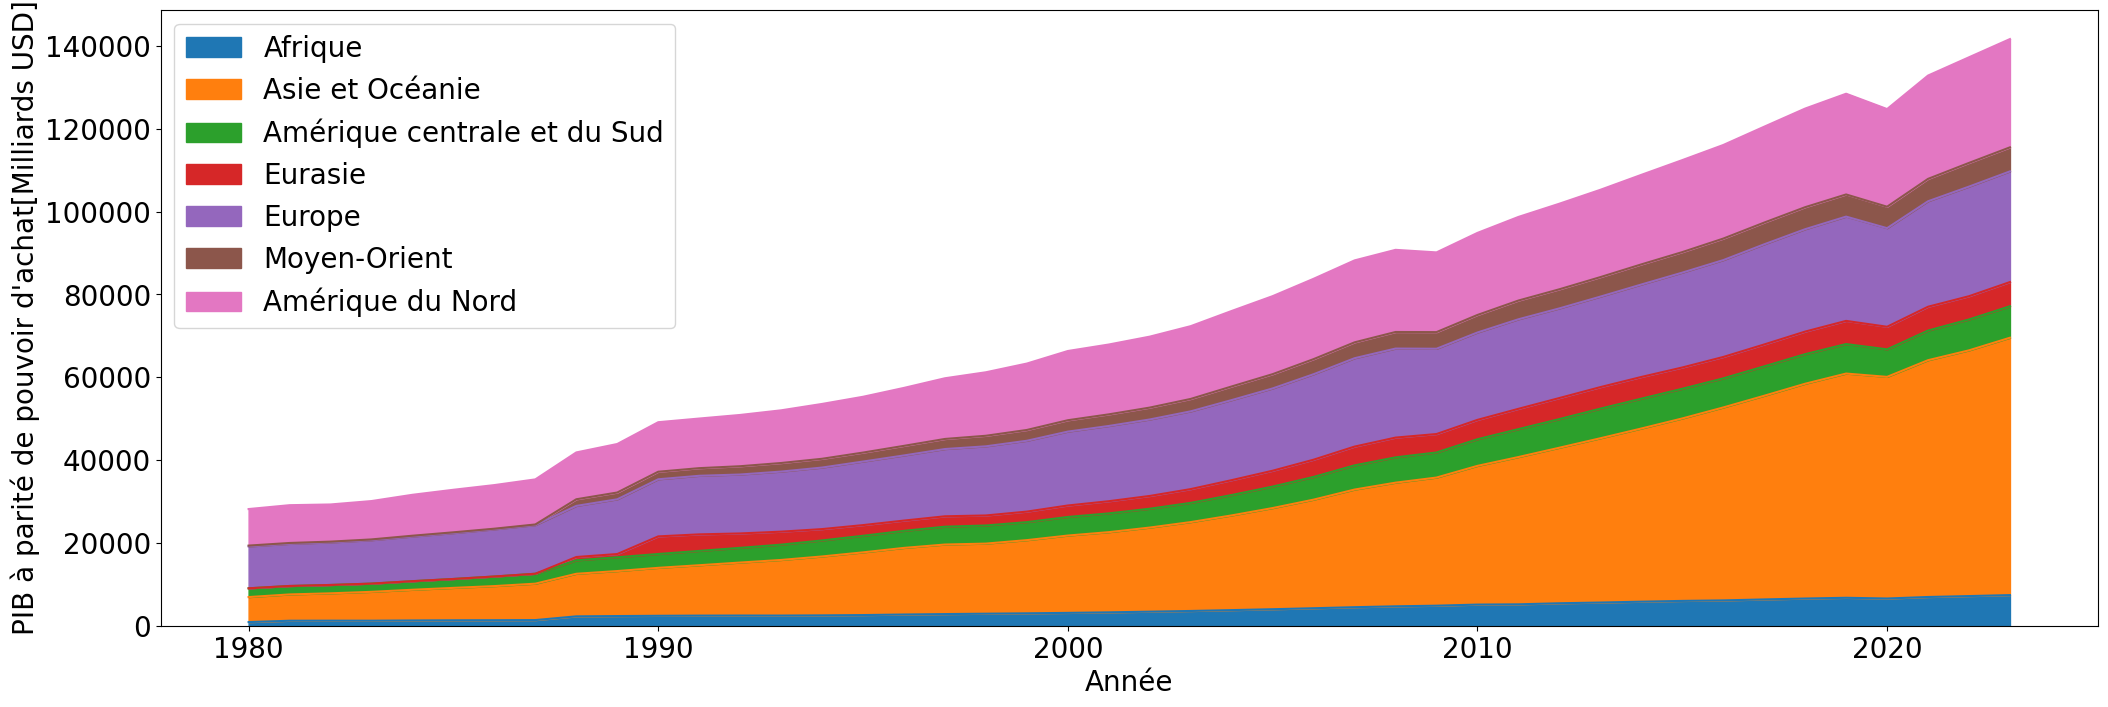

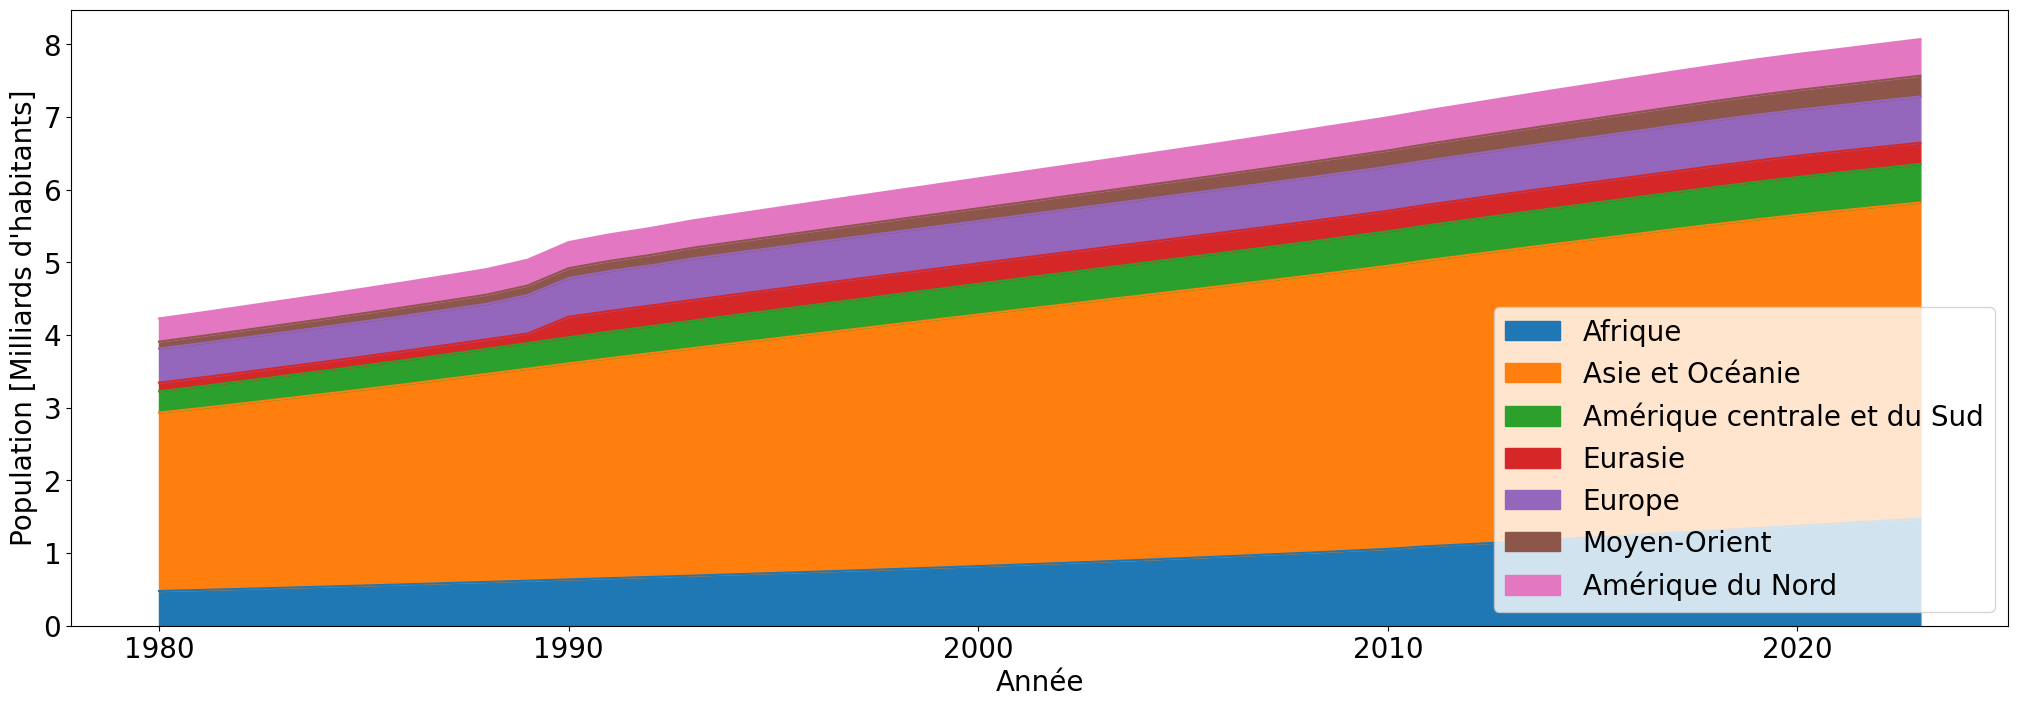

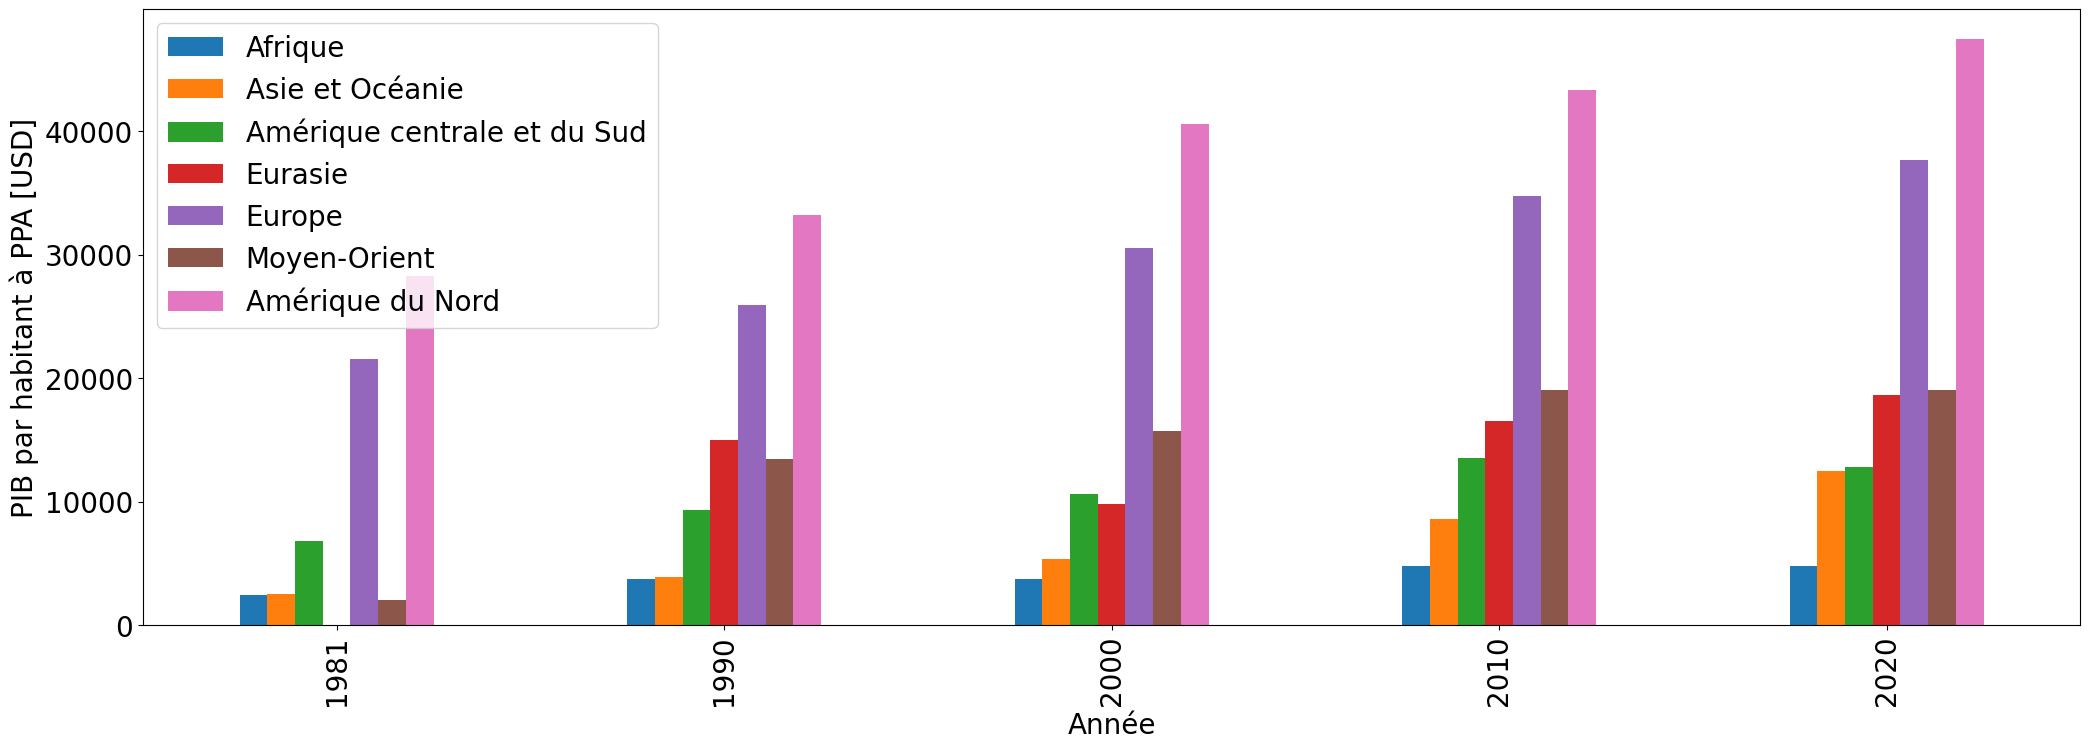

In [2]:
# Commençons par les données de population e de PIB
data_ses = api.get_data_by_id(["4701","4702"])
plot_by_region_and_type(data_ses,kind="line")

data_gdp = data_ses.loc[data_ses["productName"]=="Gross domestic product"]
data_gdp = data_gdp.sort_values(by=["countryRegionName","period"])
data_gdp = data_gdp.pivot(columns="countryRegionName",index="period",values="value")
data_gdp = data_gdp.rename(columns=country_dict_francais)
ax2=data_gdp.plot(kind="area",xlabel="Année",ylabel="PIB à parité de pouvoir d'achat[Milliards USD]")
ax2.legend(title="")
#ax2.legend(ax2.get_legend)
data_pop = data_ses.loc[data_ses["productName"]=="Population"]
data_pop = data_pop.sort_values(by=["countryRegionName","period"])
population = data_pop.pivot(index="period",values="value",columns="countryRegionName")
population = population.rename(columns=country_dict_francais)
population = population / 1000000
ax3=population.plot(kind="area",xlabel="Année",ylabel="Population [Milliards d'habitants]")
ax3.legend(title="")
population = population *1000000000
GDP_per_capita = data_gdp * 1000000000/population

GDP_per_capita_plot = GDP_per_capita.loc[GDP_per_capita.index.isin(bar_plot_year_list)]

ax4=GDP_per_capita_plot.plot(kind="bar",xlabel="Année",ylabel="PIB par habitant à PPA [USD]")
ax4.legend(title="")

## Énergie primaire consommée par continent et type de carburant
 Les données sur l'énergie consommées sont disponible sous forme d'énergie primaire totale mais aussi par type de carburant

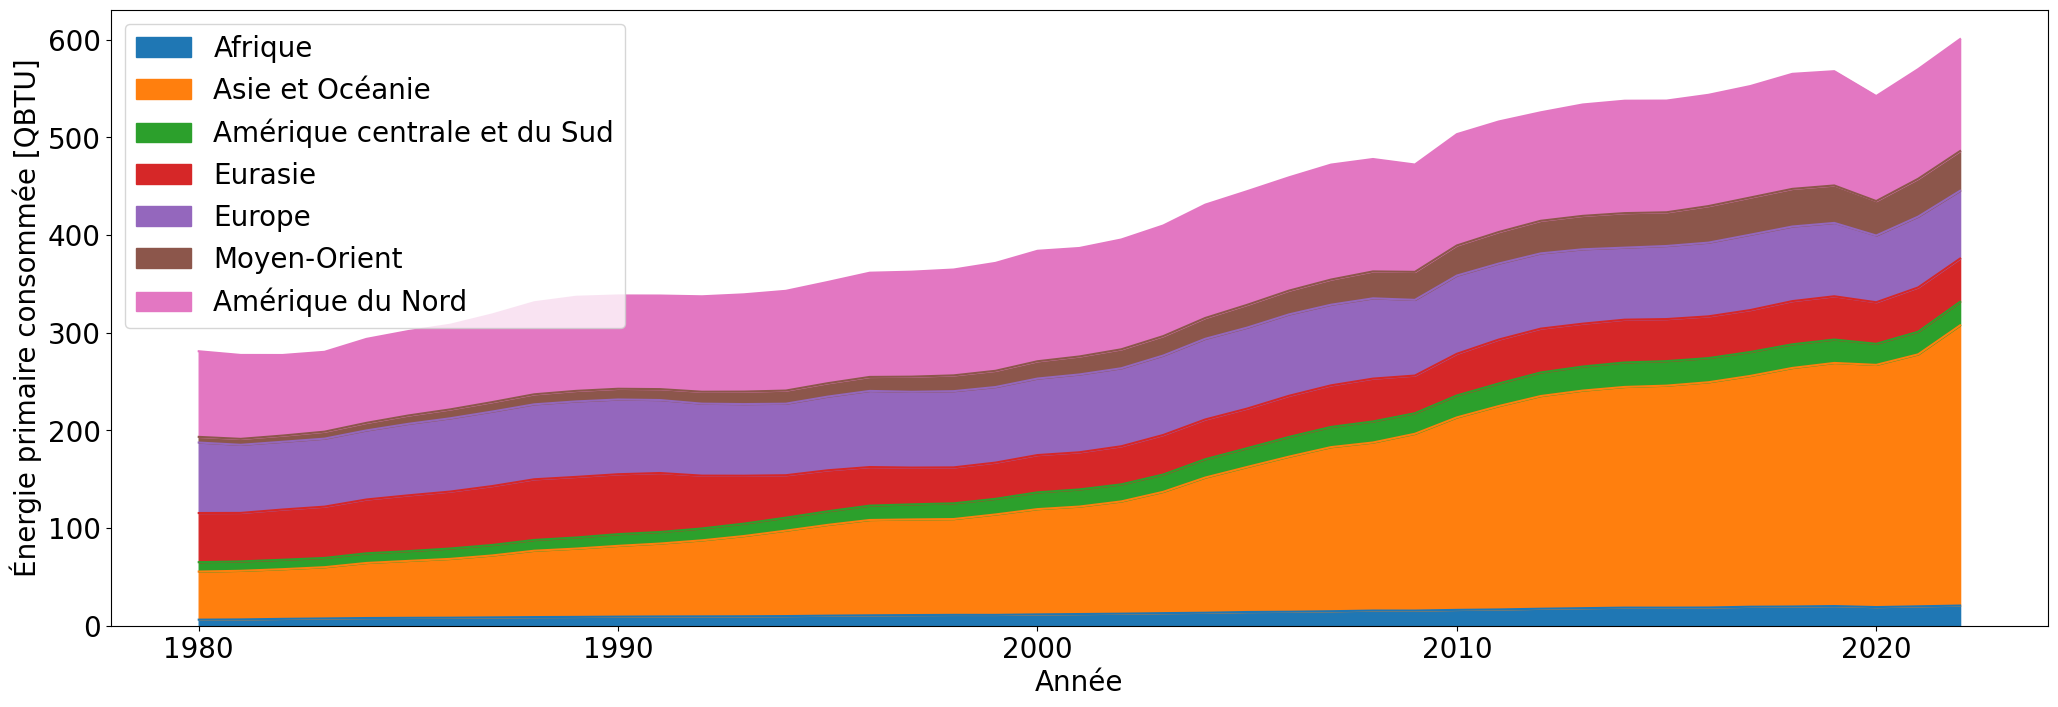

In [3]:
data_energy = api.get_data_by_id(["44","4411","4413","4415","4417","4418"],"QBTU")
data_energy_consumption = data_energy.loc[data_energy["activityName"]=="Consumption"]
data_primary_energy = data_energy.loc[(data_energy["productName"]=="Primary energy") & (data_energy["activityName"]=="Consumption")]
data_primary_energy=data_primary_energy.sort_values(by=["countryRegionName","period"])
data_primary_energy_pivot = data_primary_energy.pivot(index="period",columns="countryRegionName",values="value")
data_primary_energy_pivot = data_primary_energy_pivot.rename(columns=country_dict_francais)
ax5=data_primary_energy_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire consommée [QBTU]")


ax5.legend(title="")

#blue_patch = patches.Patch(color='blue', label='C')
#ax1.legend({"Afrique","Asie et Océanie","Amérique centrale et du Sud","Eurasie","Europe","Moyen-Orient","Amérique du Nord"})
#plot_by_region_and_type(data_energy_consumption,kind="area")


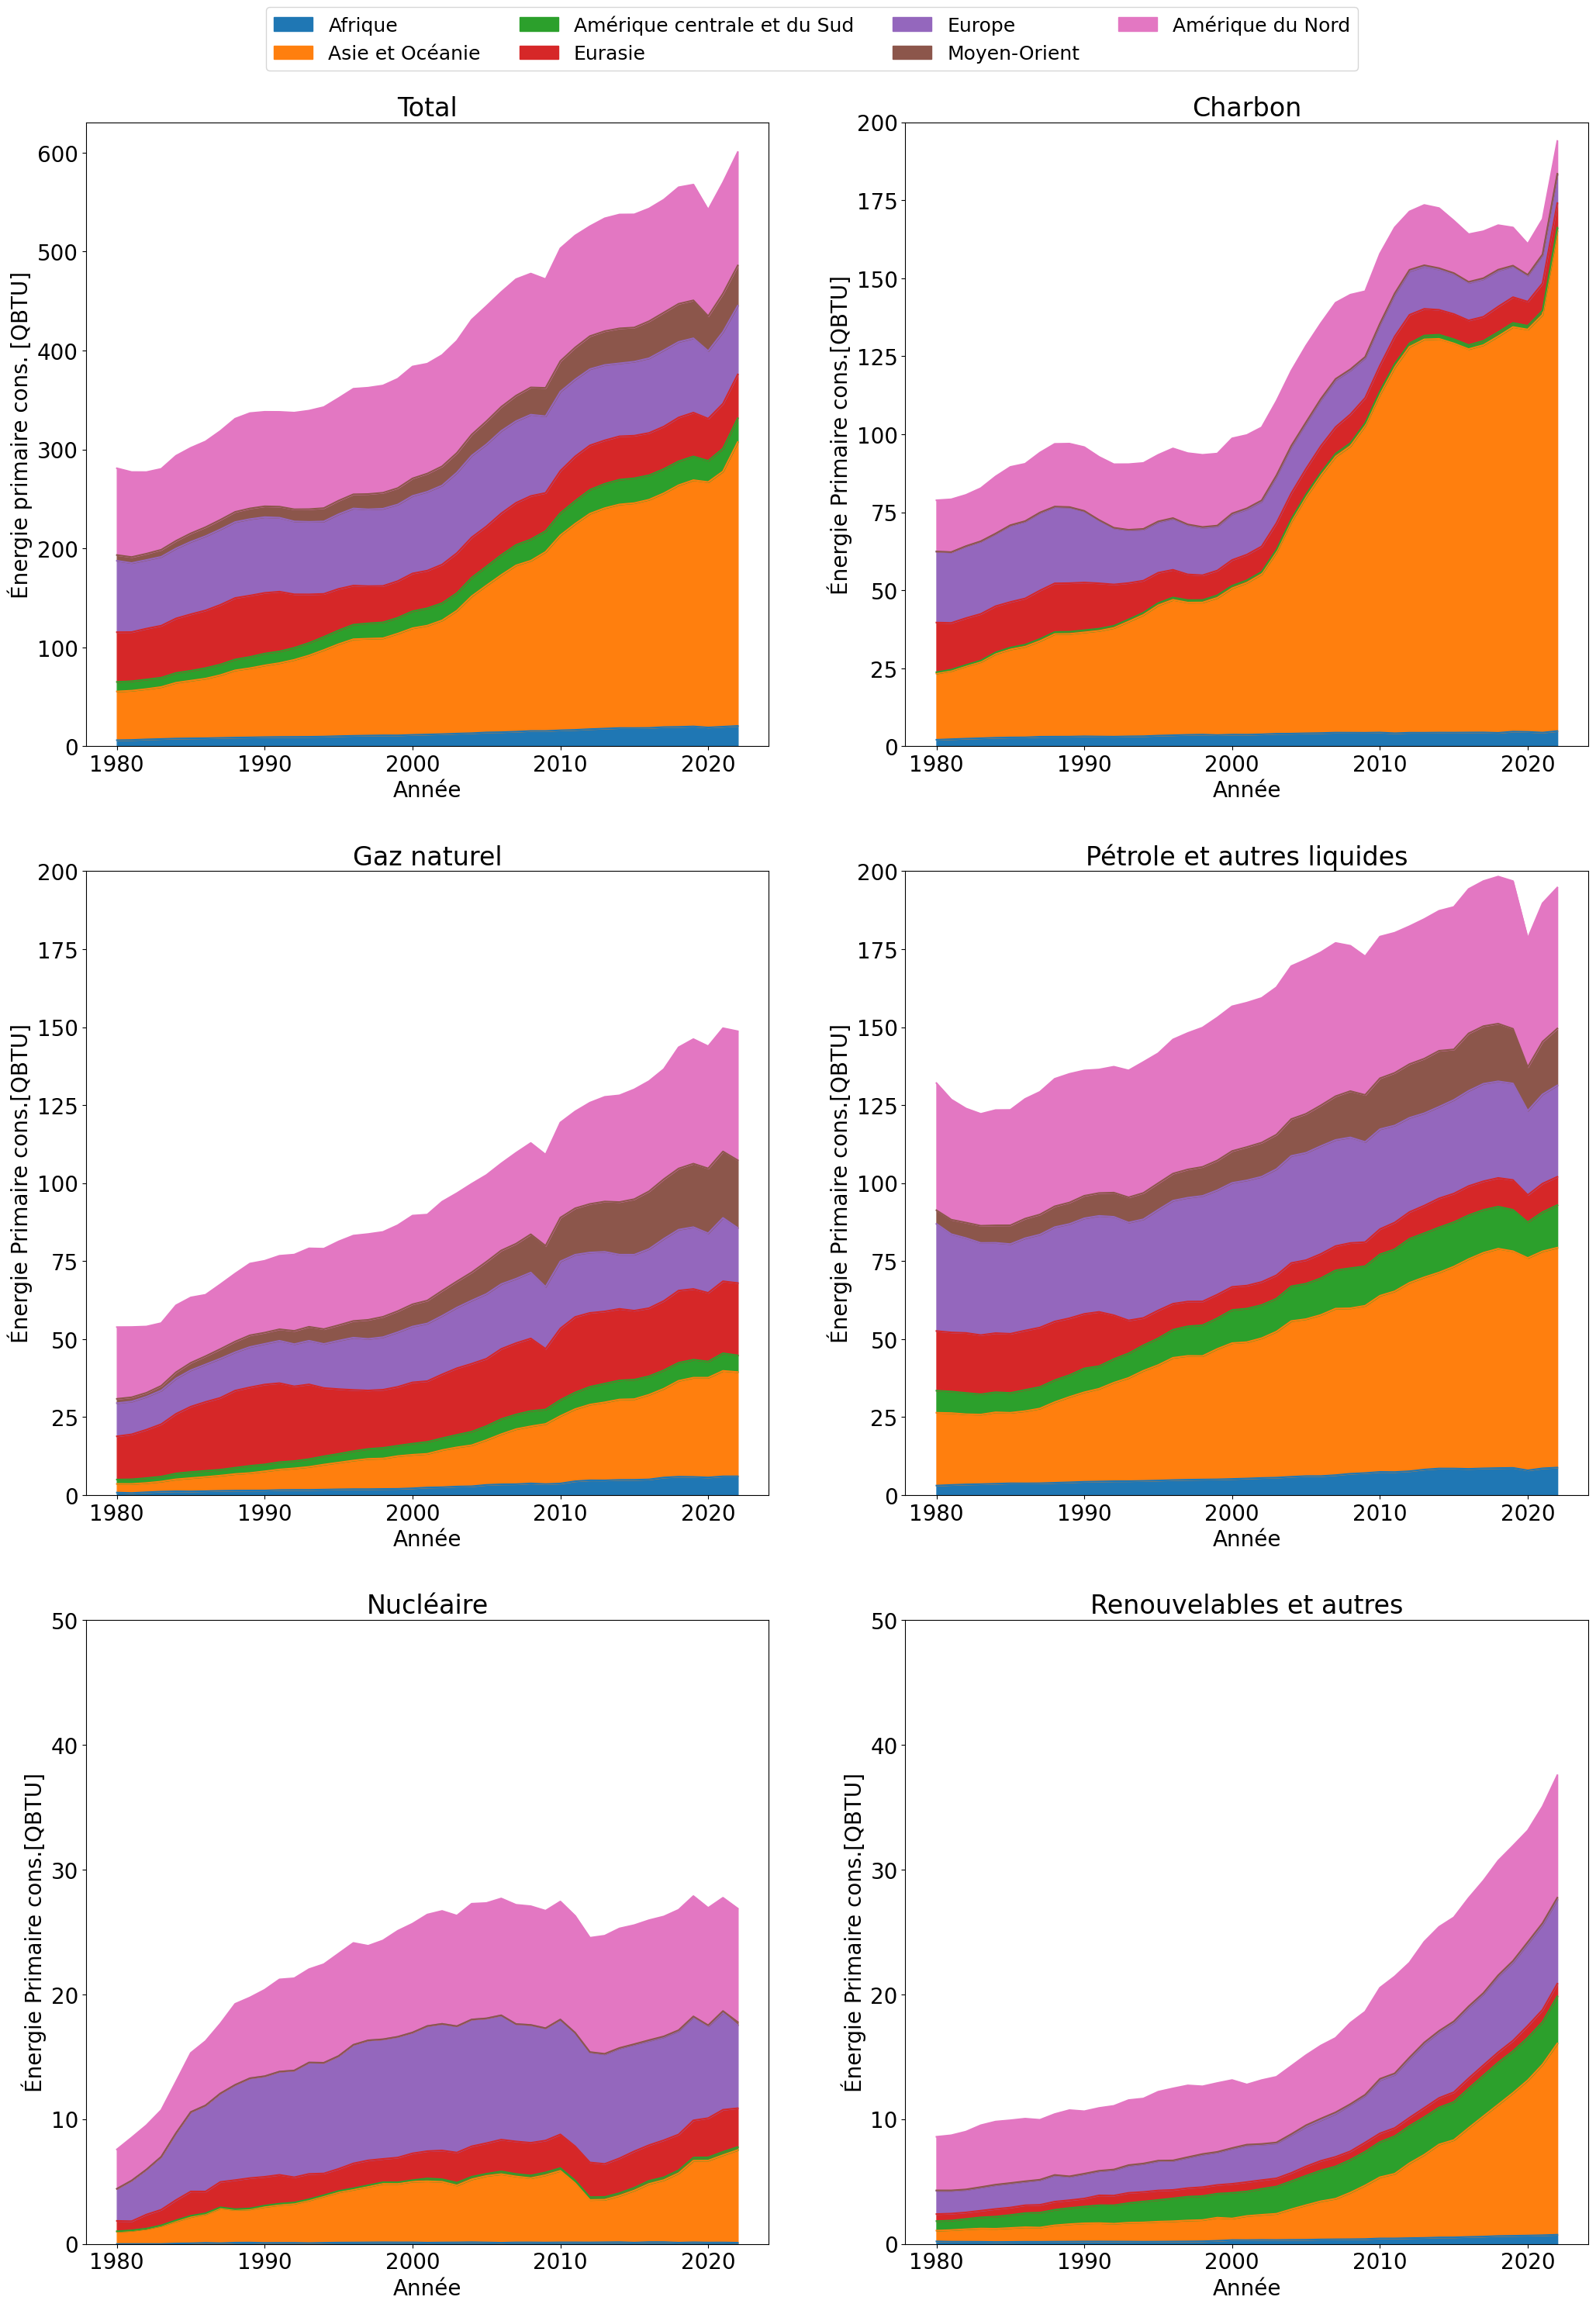

In [50]:

# Faisons un graphique de la consommation d'énergie par type d'énergie
fig_cons_par_produit = plt.figure(figsize=[25,24])
ax11=plt.subplot(3,2,1)
data_primary_energy_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax11)
ax11.legend(title="",loc="upper left",ncols=4,bbox_to_anchor=(0.25,1.2),fontsize=18)
plt.title("Total")
ax12=plt.subplot(3,2,2)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Coal") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax12,ylim=[0,200])
ax12.get_legend().remove()
plt.title("Charbon")
# Gaz naturel
ax13=plt.subplot(3,2,3)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Natural gas") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax13,ylim=[0,200])
plt.title("Gaz naturel")
ax13.get_legend().remove()
# Pétrole
ax14=plt.subplot(3,2,4)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Petroleum and other liquids") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax14,ylim=[0,200])
plt.title("Pétrole et autres liquides")
ax14.get_legend().remove()
# Nucléaire
ax15=plt.subplot(3,2,5)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Nuclear") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax15,ylim=[0,50])
plt.title("Nucléaire")
ax15.get_legend().remove()
# Renouvelables
ax16=plt.subplot(3,2,6)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Renewables and other") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax16,ylim=[0,50])
plt.title("Renouvelables et autres")
ax16.get_legend().remove()
fig_cons_par_produit.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)

## Distribution de l'énergie primaire et de la population par continent
Regardons à quel point l'énergie est également distribué entre les différents continents par rapport à la population

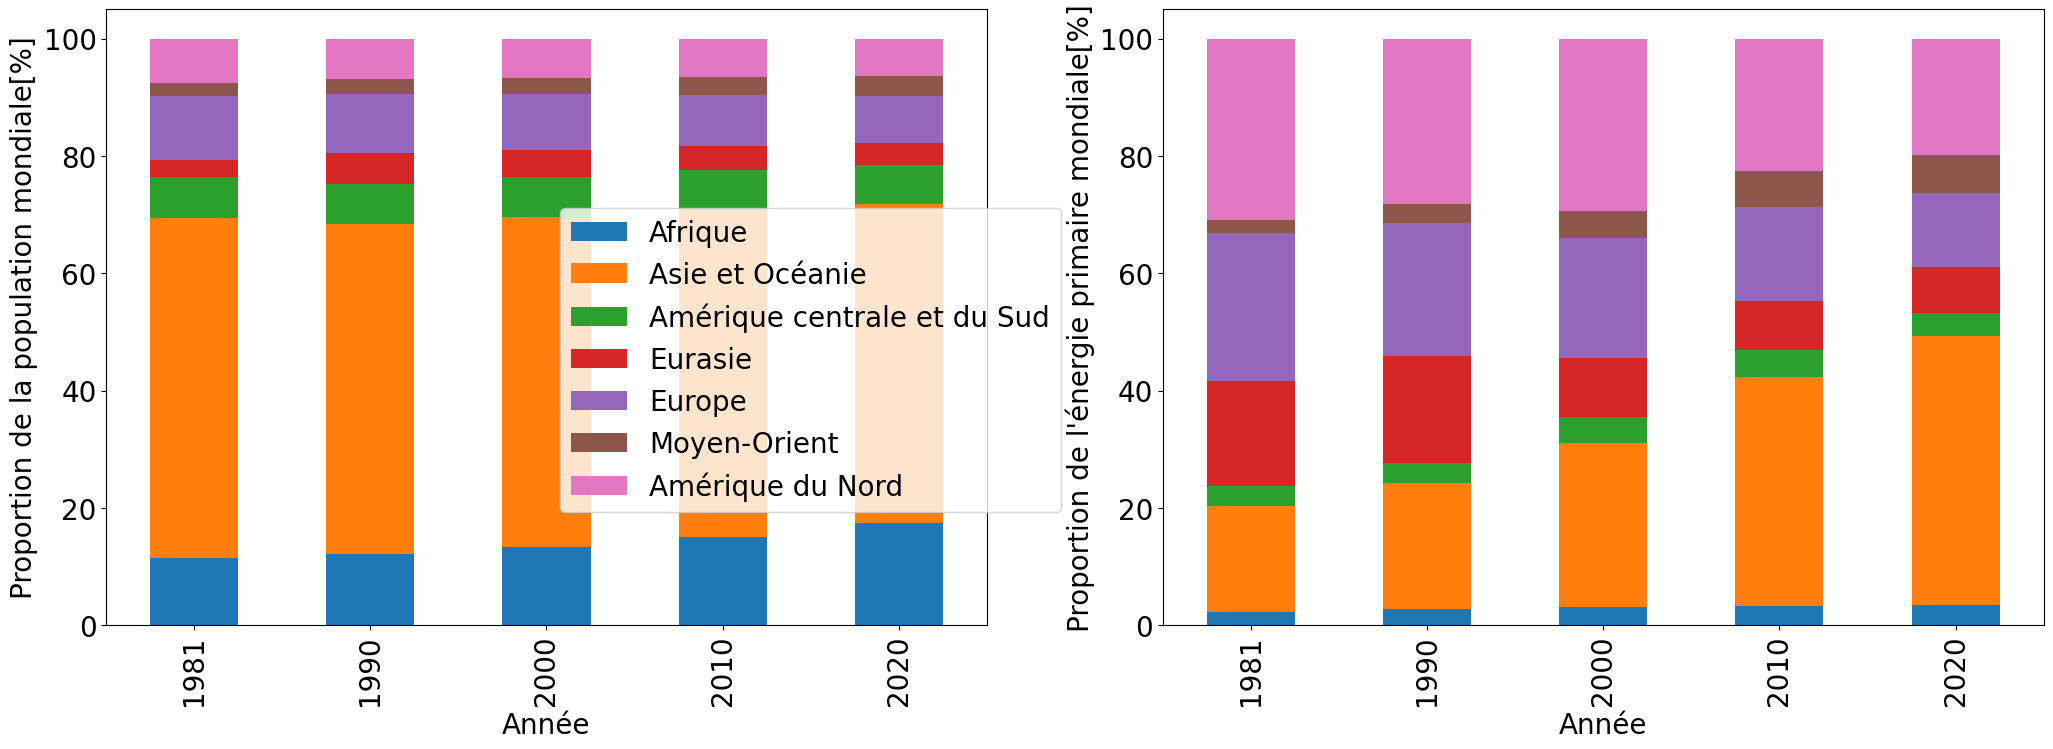

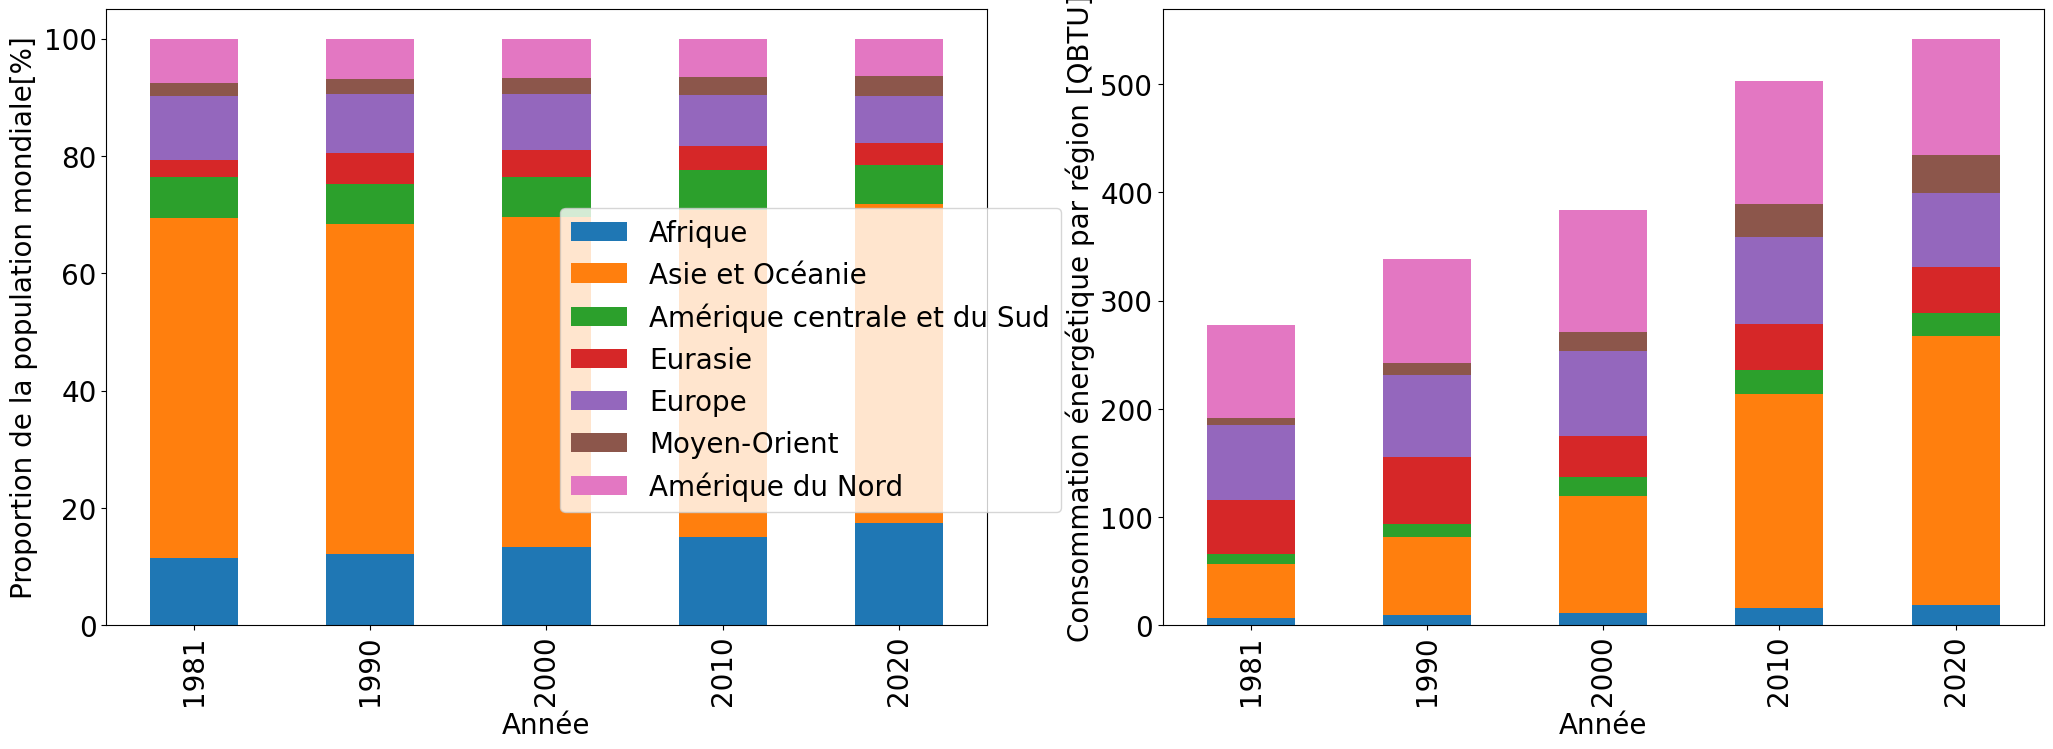

In [5]:
population_totale = population["Afrique"]+population["Amérique centrale et du Sud"]+population["Amérique du Nord"]+population["Asie et Océanie"]+population["Eurasie"]+population["Europe"]+population["Moyen-Orient"]
population_prop = pd.DataFrame()
population_prop["Afrique"] = population["Afrique"] /population_totale *100
population_prop["Asie et Océanie"]=population["Asie et Océanie"]/population_totale *100
population_prop["Amérique centrale et du Sud"]=population["Amérique centrale et du Sud"]/population_totale *100
population_prop["Eurasie"]=population["Eurasie"]/population_totale *100
population_prop["Europe"]=population["Europe"]/population_totale *100
population_prop["Moyen-Orient"]=population["Moyen-Orient"]/population_totale *100
population_prop["Amérique du Nord"]=population["Amérique du Nord"]/population_totale *100
population_prop_plot = population_prop.loc[population_prop.index.isin(bar_plot_year_list)]


primary_energy_total = data_primary_energy_pivot["Afrique"]+data_primary_energy_pivot["Amérique centrale et du Sud"]+data_primary_energy_pivot["Amérique du Nord"]+data_primary_energy_pivot["Asie et Océanie"]+data_primary_energy_pivot["Eurasie"]+data_primary_energy_pivot["Europe"]+data_primary_energy_pivot["Moyen-Orient"]
primary_energy_prop = pd.DataFrame()
primary_energy_prop["Afrique"] = data_primary_energy_pivot["Afrique"] /primary_energy_total *100
primary_energy_prop["Asie et Océanie"]=data_primary_energy_pivot["Asie et Océanie"]/primary_energy_total *100
primary_energy_prop["Amérique centrale et du Sud"]=data_primary_energy_pivot["Amérique centrale et du Sud"]/primary_energy_total *100
primary_energy_prop["Eurasie"]=data_primary_energy_pivot["Eurasie"]/primary_energy_total *100
primary_energy_prop["Europe"]=data_primary_energy_pivot["Europe"]/primary_energy_total *100
primary_energy_prop["Moyen-Orient"]=data_primary_energy_pivot["Moyen-Orient"]/primary_energy_total *100
primary_energy_prop["Amérique du Nord"]=data_primary_energy_pivot["Amérique du Nord"]/primary_energy_total *100
primary_energy_prop_plot = primary_energy_prop.loc[primary_energy_prop.index.isin(bar_plot_year_list)]

# Proportion
ax7=plt.subplot(1,2,1)
population_prop_plot.plot(kind="bar",xlabel="Année",ylabel="Proportion de la population mondiale[%]",stacked=True,ax=ax7)

ax8=plt.subplot(1,2,2)
primary_energy_prop_plot.plot(kind="bar",xlabel="Année",ylabel="Proportion de l'énergie primaire mondiale[%]",stacked=True,ax=ax8)
ax7.legend(bbox_to_anchor=(0.5 , 0.7))
ax8.get_legend().remove()
plt.figure()
# total of energy
ax9=plt.subplot(1,2,1)
population_prop_plot.plot(kind="bar",xlabel="Année",ylabel="Proportion de la population mondiale[%]",stacked=True,ax=ax9)
data_primary_energy_pivot_bar_plot = data_primary_energy_pivot.loc[data_primary_energy_pivot.index.isin(bar_plot_year_list)]
ax10=plt.subplot(1,2,2)
data_primary_energy_pivot_bar_plot.plot(kind="bar",xlabel="Année",ylabel="Consommation énergétique par région [QBTU]",stacked=True,ax=ax10)
ax9.legend(bbox_to_anchor=(0.5 , 0.7))
ax10.get_legend().remove()


## Mix énergétique Mondial

Ici on va regarder le mix énergétique mondial en termes d'énergie primaire par type de sources

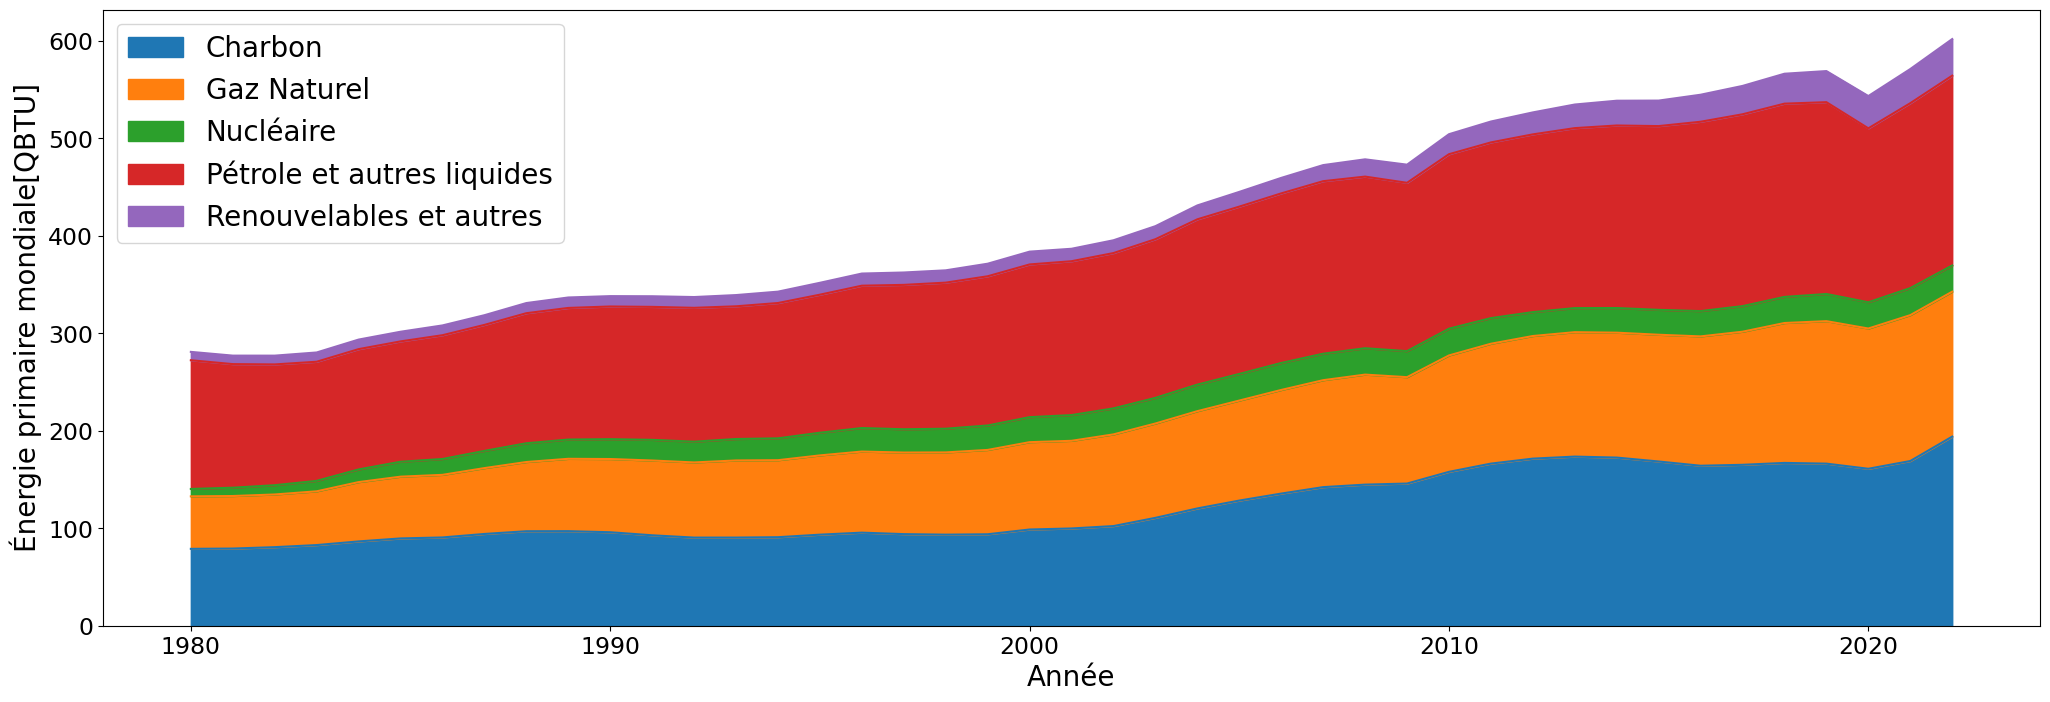

In [6]:
global_energy_consumption = api.get_data_by_id(["4411","4413","4415","4417","4418"],unit="QBTU",regions=region_list_global)
global_energy_consumption = global_energy_consumption.loc[global_energy_consumption["activityName"]=="Consumption"]
global_energy_consumption = global_energy_consumption.sort_values(by=["productName","period"])
global_energy_consumption_pivot = global_energy_consumption.pivot(index="period",columns="productName",values="value")
global_energy_consumption_pivot = global_energy_consumption_pivot.rename(columns=fuel_dict_francais)
ax6=global_energy_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire mondiale[QBTU]",fontsize=17)
ax6.legend(title="")

On constate que le mix énergétique est très différent par continent et que les tendances diffèrent aussi.

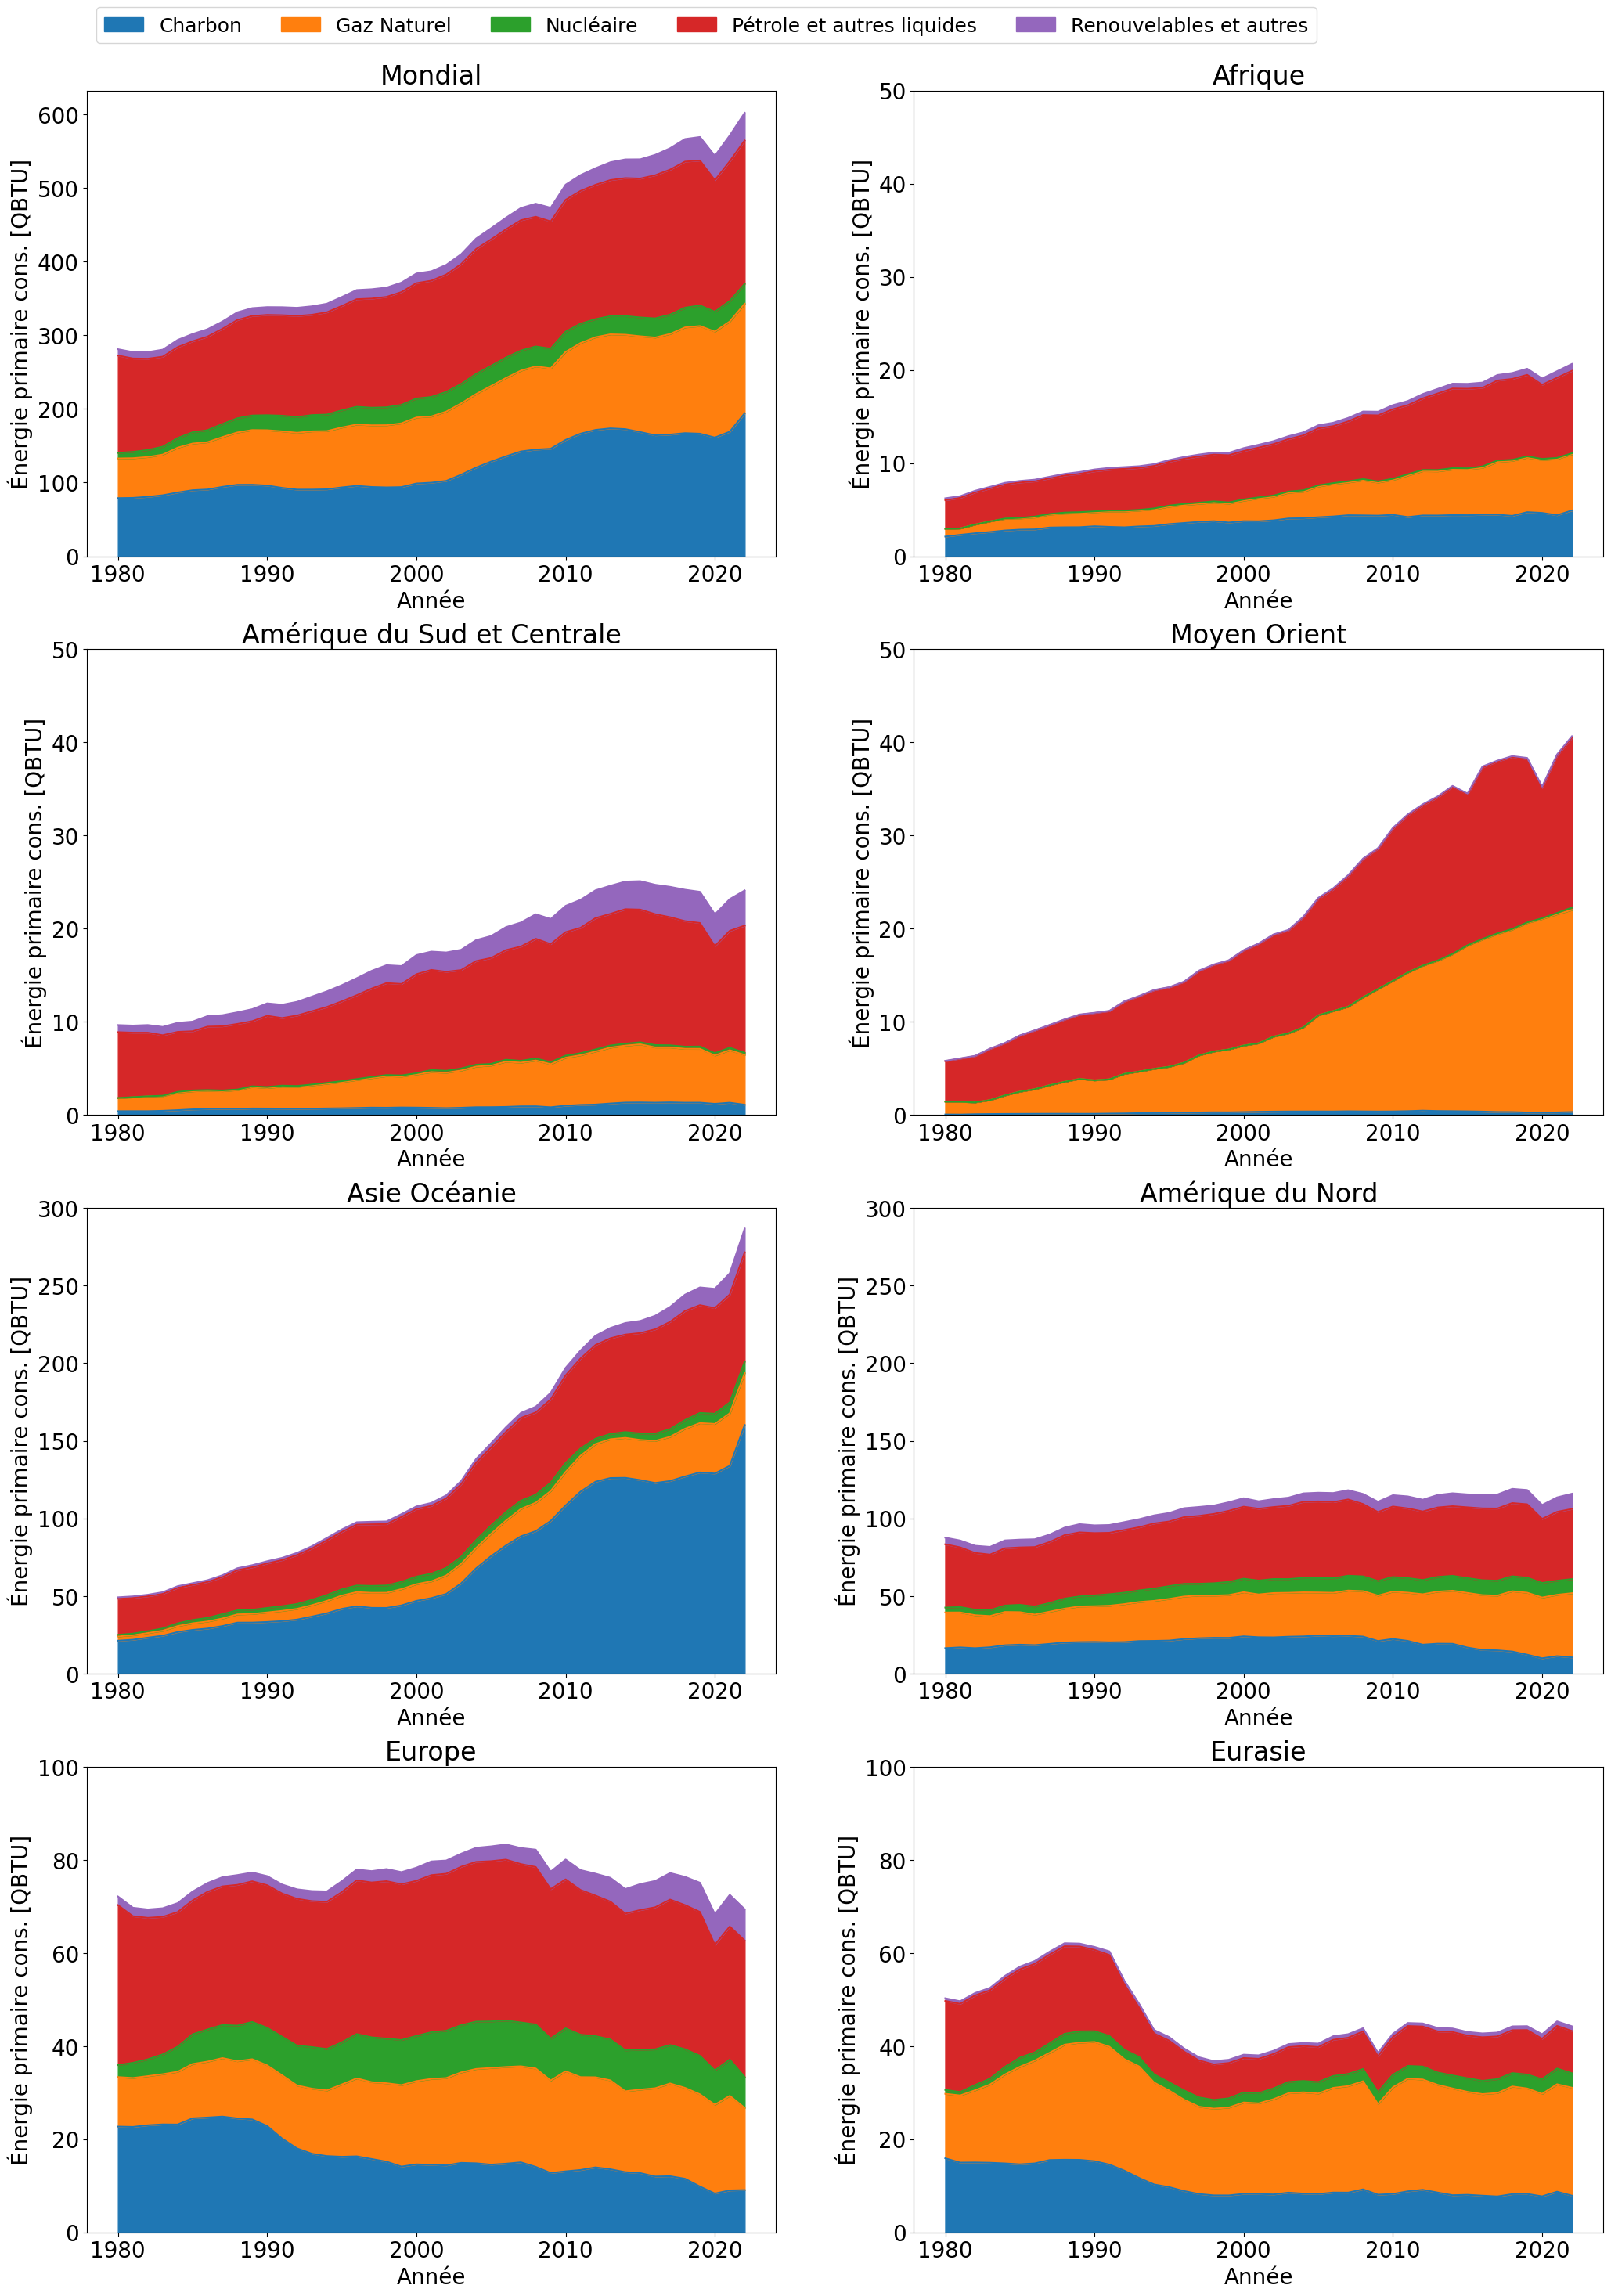

In [47]:
# Regardons le mix énergétique par continent
fig_mix_cont = plt.figure(figsize=[25,24])
ax20=plt.subplot(4,2,1)
global_energy_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax20)
ax20.legend(title="",loc="upper left",ncols=5,bbox_to_anchor=(0,1.2),fontsize=18)
plt.title("Mondial")
# Asie Océanie
ax22=plt.subplot(4,2,5)
data_mix_asoc = data_energy.loc[(data_energy["countryRegionId"]=="ASOC") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_asoc = data_mix_asoc.sort_values(by=["productName","period"])
data_mix_asoc = data_mix_asoc.pivot(columns="productName",index="period",values="value")
data_mix_asoc.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax22,ylim=[0,300])
ax22.get_legend().remove()
plt.title("Asie Océanie")
# Afrique
ax21=plt.subplot(4,2,2)
data_mix_africa = data_energy.loc[(data_energy["countryRegionId"]=="AFRC") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_africa = data_mix_africa.sort_values(by=["productName","period"])
data_mix_africa = data_mix_africa.pivot(columns="productName",index="period",values="value")
data_mix_africa.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax21,ylim=[0,50])
ax21.get_legend().remove()
plt.title("Afrique")


["AFRC","ASOC","CSAM","EURA","EURO","MIDE","NOAM"]
# Amérique du sud et centrale
ax23=plt.subplot(4,2,3)
data_mix_csam = data_energy.loc[(data_energy["countryRegionId"]=="CSAM") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_csam = data_mix_csam.sort_values(by=["productName","period"])
data_mix_csam = data_mix_csam.pivot(columns="productName",index="period",values="value")
data_mix_csam.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax23,ylim=[0,50])
ax23.get_legend().remove()
plt.title("Amérique du Sud et Centrale")
# Eurasie
ax24=plt.subplot(4,2,8)
data_mix_eura = data_energy.loc[(data_energy["countryRegionId"]=="EURA") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_eura = data_mix_eura.sort_values(by=["productName","period"])
data_mix_eura = data_mix_eura.pivot(columns="productName",index="period",values="value")
data_mix_eura.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax24,ylim=[0,100])
ax24.get_legend().remove()
plt.title("Eurasie")
# Moyen-Orient
ax25=plt.subplot(4,2,4)
data_mix_mide = data_energy.loc[(data_energy["countryRegionId"]=="MIDE") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_mide = data_mix_mide.sort_values(by=["productName","period"])
data_mix_mide = data_mix_mide.pivot(columns="productName",index="period",values="value")
data_mix_mide.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax25,ylim=[0,50])
ax25.get_legend().remove()
plt.title("Moyen Orient")
fig_mix_cont.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)
# Europe
ax26=plt.subplot(4,2,7)
data_mix_euro = data_energy.loc[(data_energy["countryRegionId"]=="EURO") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_euro = data_mix_euro.sort_values(by=["productName","period"])
data_mix_euro = data_mix_euro.pivot(columns="productName",index="period",values="value")
data_mix_euro.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax26,ylim=[0,100])
ax26.get_legend().remove()
plt.title("Europe")
fig_mix_cont.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)
# Amérique du nord
ax27=plt.subplot(4,2,6)
data_mix_noam = data_energy.loc[(data_energy["countryRegionId"]=="NOAM") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_noam = data_mix_noam.sort_values(by=["productName","period"])
data_mix_noam = data_mix_noam.pivot(columns="productName",index="period",values="value")
data_mix_noam.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax27,ylim=[0,300])
ax27.get_legend().remove()
plt.title("Amérique du Nord")
fig_mix_cont.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)


## Imporation des données sur les émissions de GES
On peut aussi importer les données de GES de l'API de l'EIA

<Axes: xlabel='Année', ylabel='GES [Millions Tonnes Métriques]'>

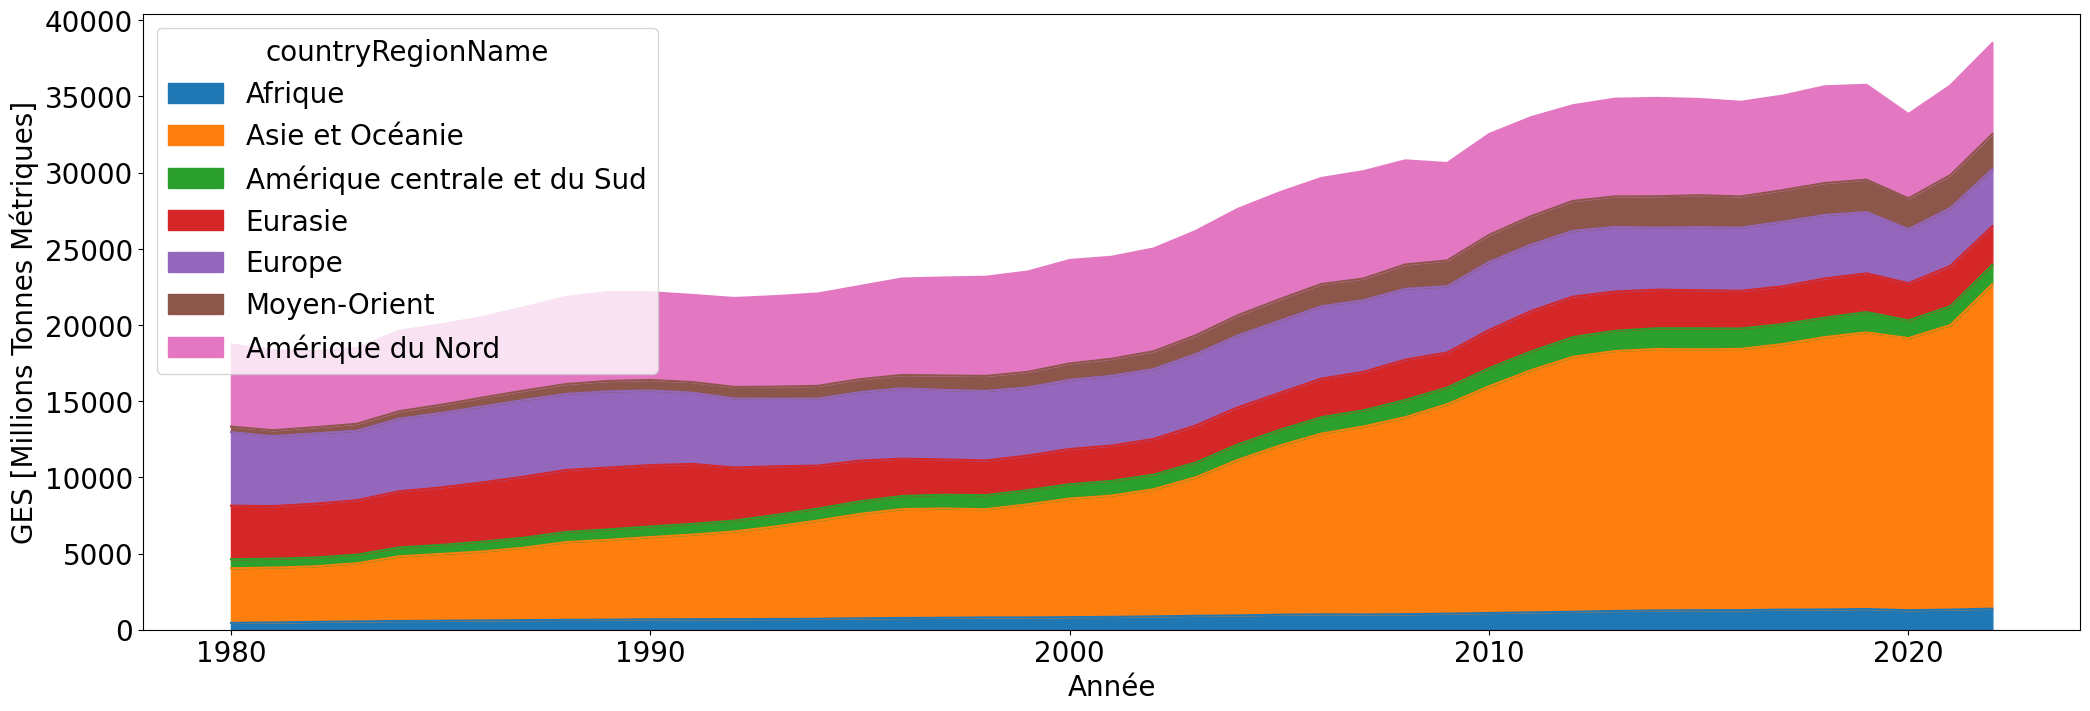

In [8]:
data_emissions = api.get_data_by_id(["4008","4002","3002","4006"])
data_emissions = data_emissions.loc[data_emissions["period"]>1979]
data_emissions_total = data_emissions.loc[data_emissions["productName"]=="CO2 emissions"]
dude = data_emissions_total.index[0]
data_emissions_total_units = data_emissions_total.loc[dude,"unitName"]
data_emissions_total_pivot = data_emissions_total.pivot(index="period",columns="countryRegionName",values="value")
data_emissions_total_pivot = data_emissions_total_pivot.rename(columns=country_dict_francais)
data_emissions_total_pivot.plot(kind="area",xlabel="Année",ylabel="GES [Millions Tonnes Métriques]")

## Regardons les données de GES par habitant

On peut tirer la population d'un côté, les GES de l'autre et regarder l'évolution

<Axes: xlabel='Année', ylabel='Tonnes de CO2 par habitant'>

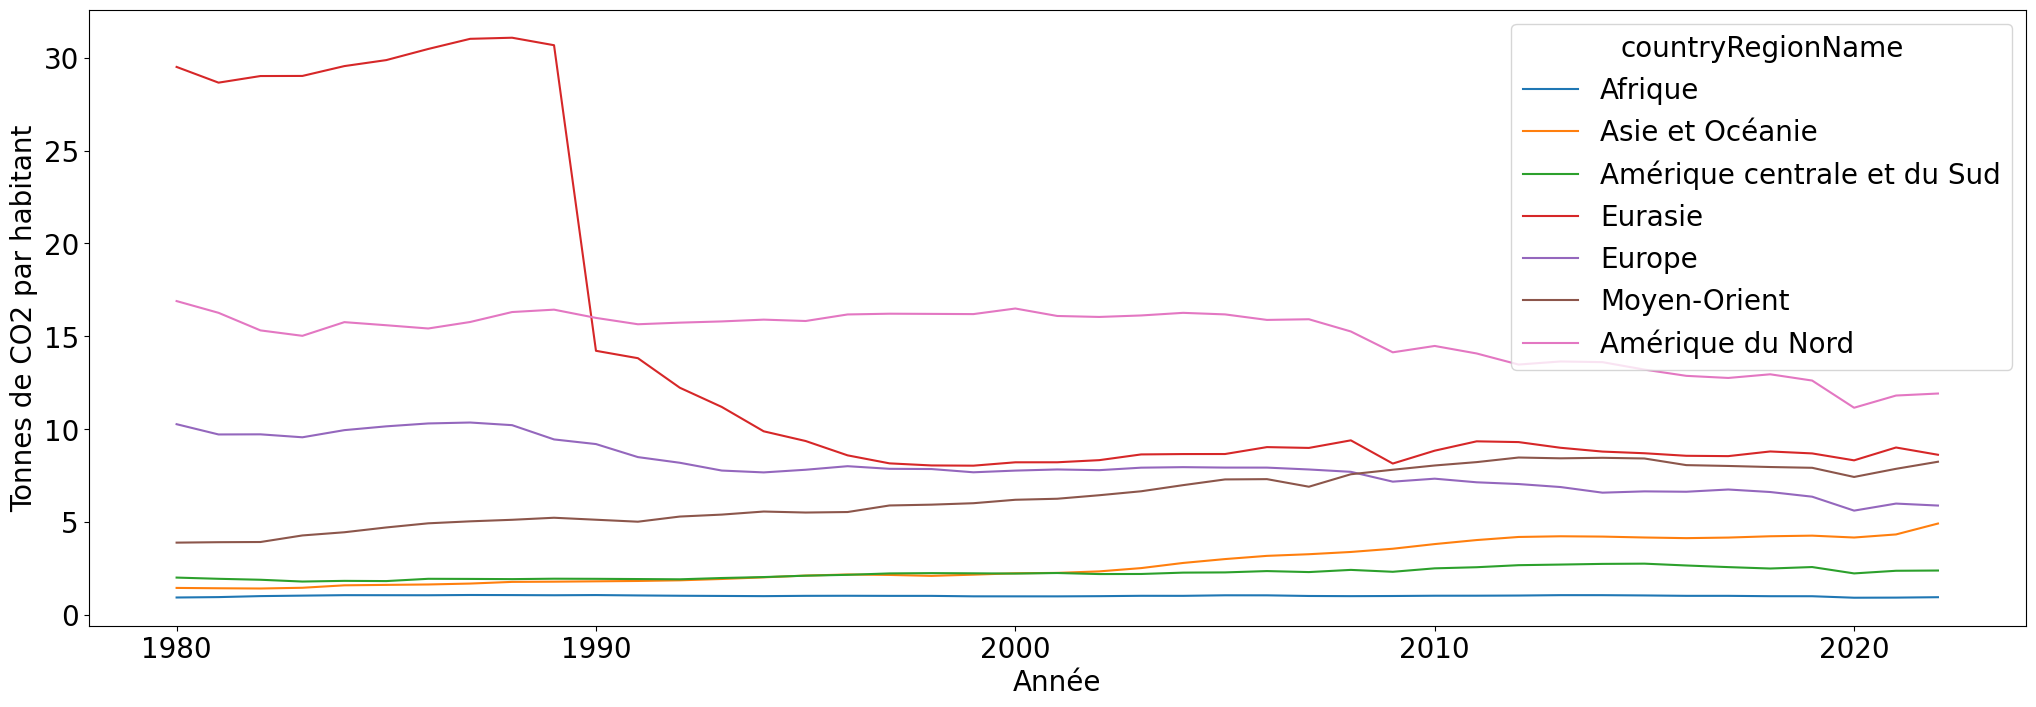

In [9]:
GES_per_capita = data_emissions_total_pivot * 1000000/population
#GES_per_capita.drop(columns="Eurasia",inplace=True)
GES_per_capita.plot(kind="line",xlabel="Année",ylabel="Tonnes de CO2 par habitant")

## Intensité des émissions
Les intensités d'émissions sont déjà calculées donc pourquoi ne pas commencer avec ces données là à la place juste pour regarder

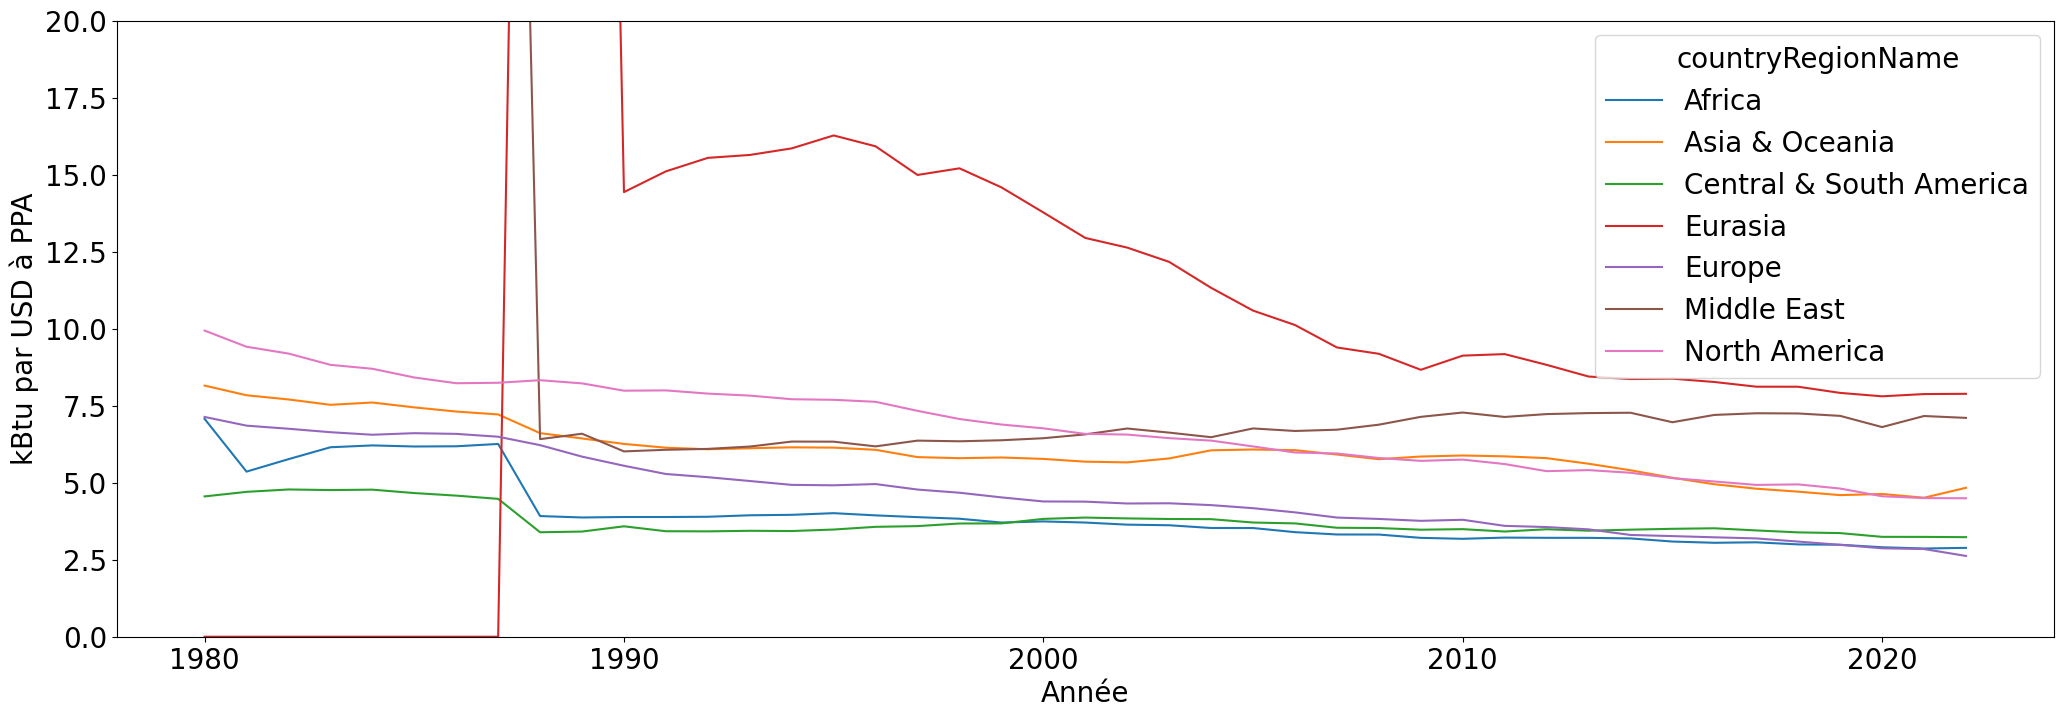

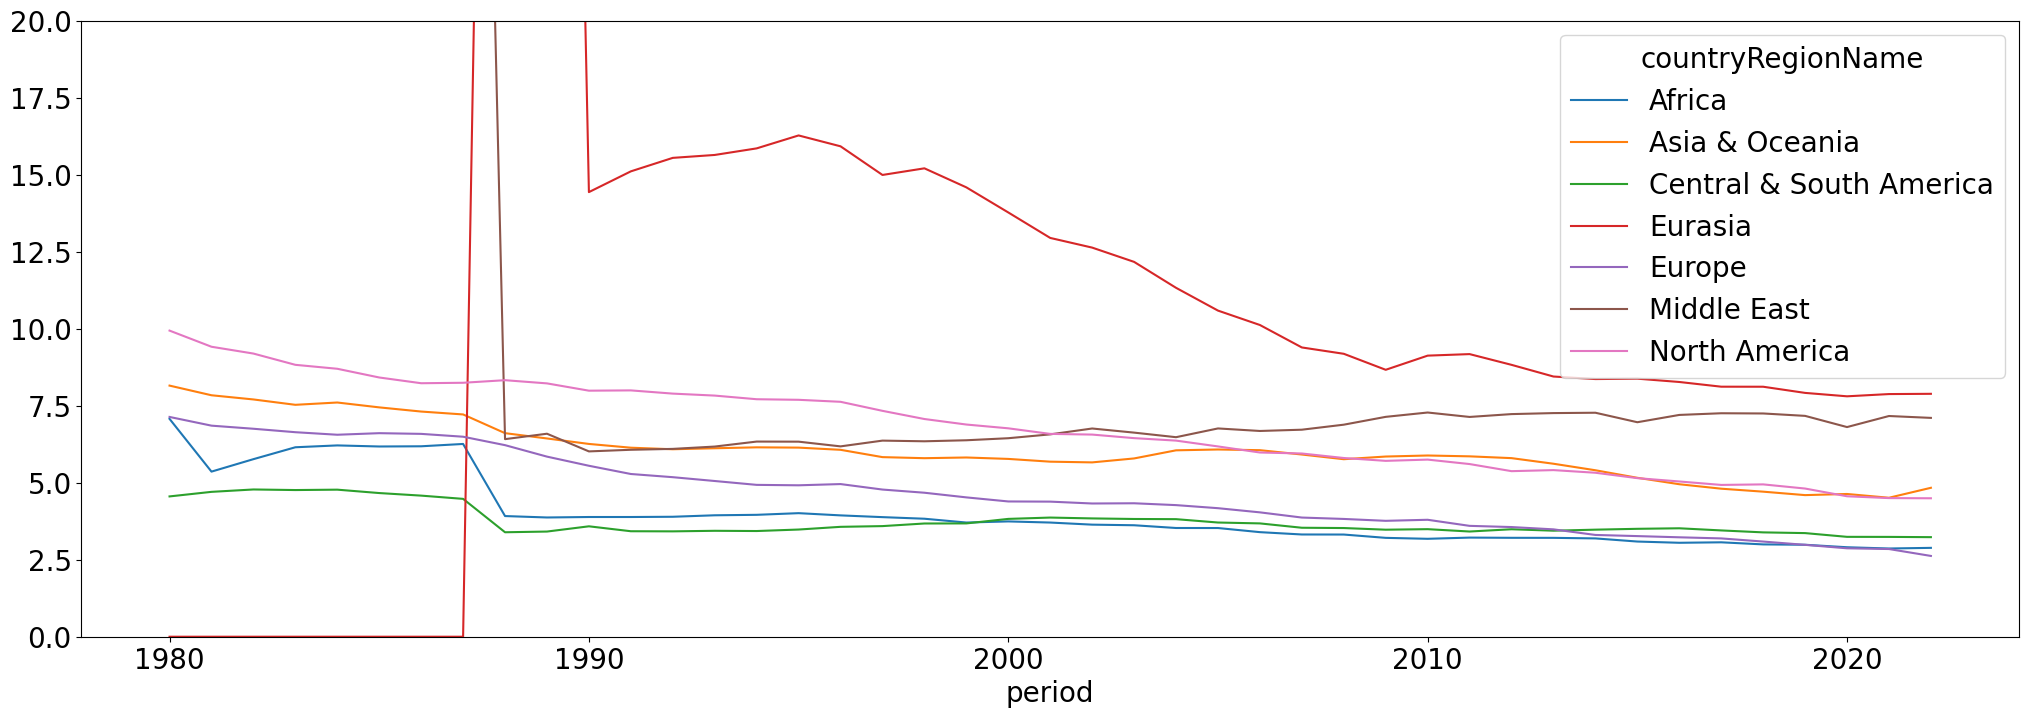

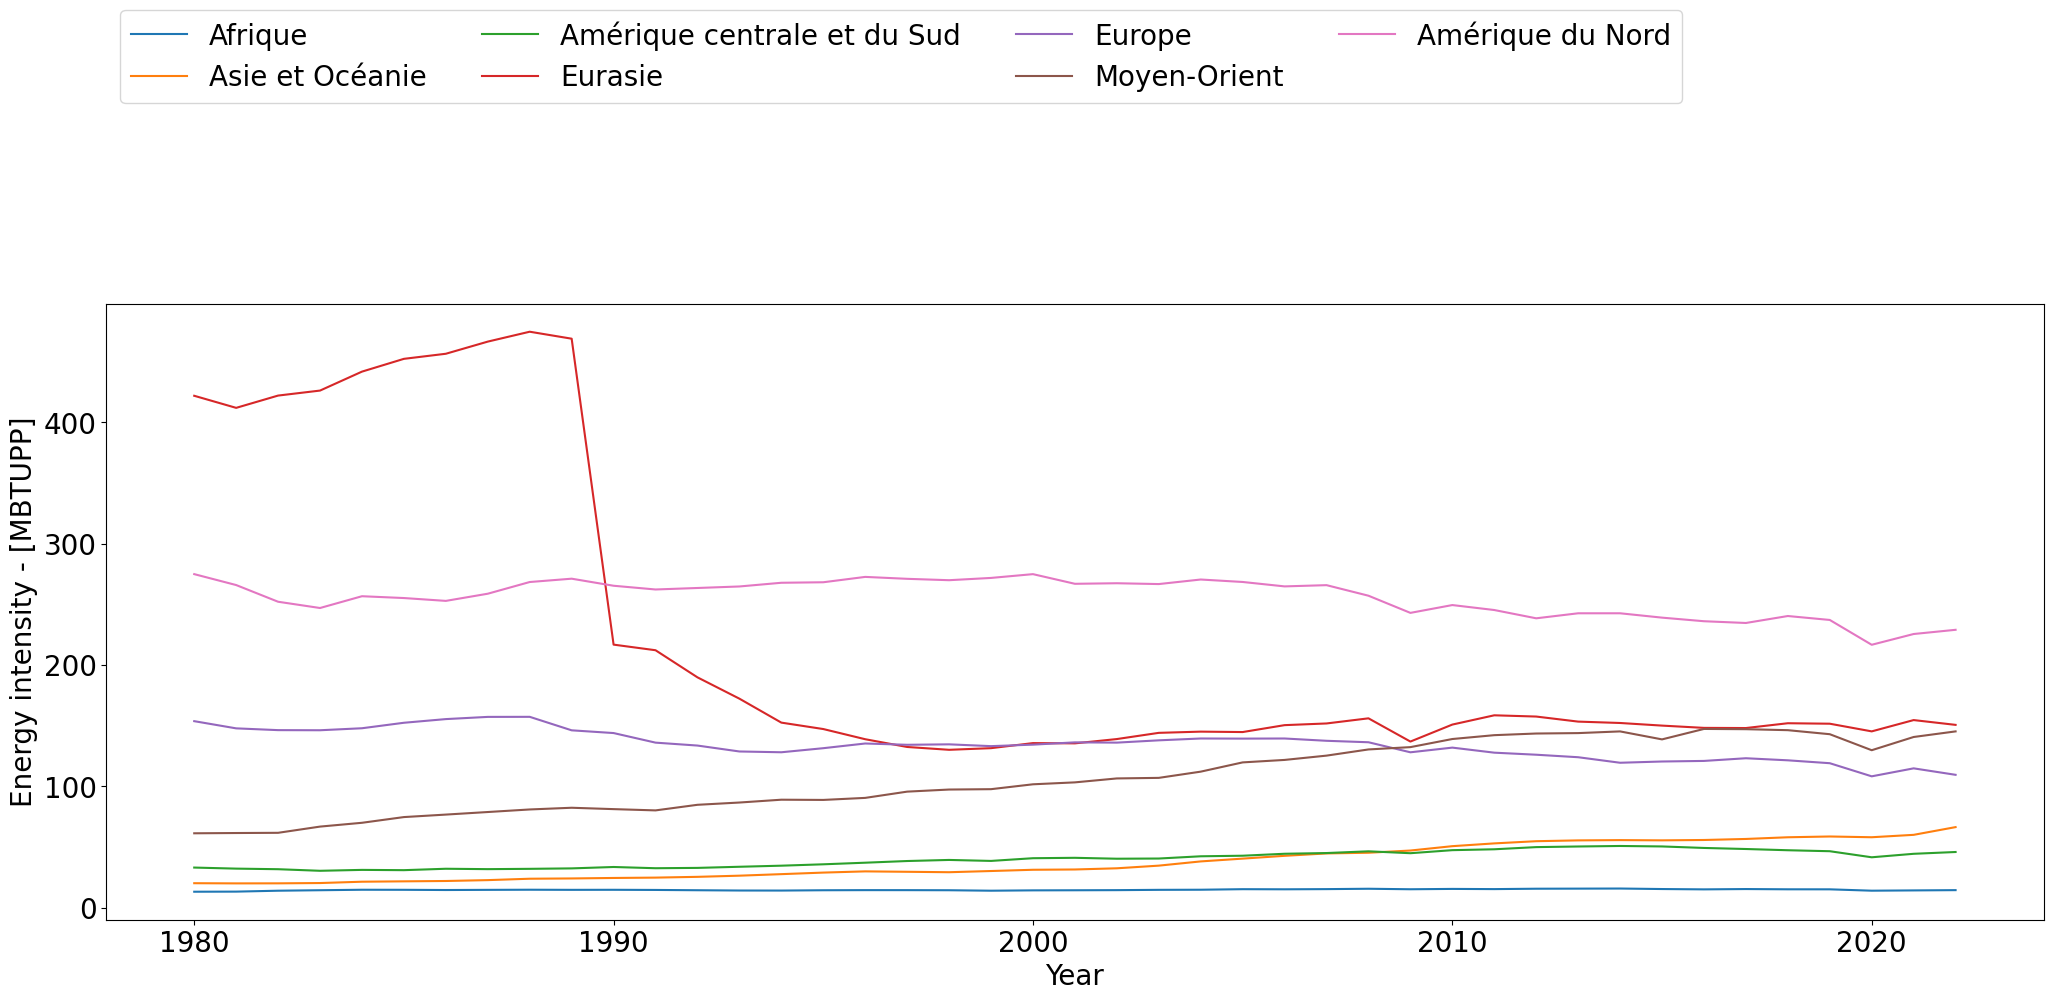

In [10]:
emissions_intensity  = api.get_data_by_id(["47"])
GDP_intensity = emissions_intensity.loc[emissions_intensity["activityName"]=="GDP"]
GDP_intensity_pivot = GDP_intensity.pivot(index="period",columns="countryRegionName",values="value")
GDP_intensity_pivot.plot(kind="line",ylim=[0,20],xlabel="Année",ylabel="kBtu par USD à PPA")
#GDP_productivity = 1.0/GDP_intensity
#GDP_productivity.plot(kind="line")
GDP_intensity_pivot.plot(kind="line",ylim=[0,20])
plot_by_region_and_type(emissions_intensity.loc[emissions_intensity["activityName"]=="Population"],kind="line")